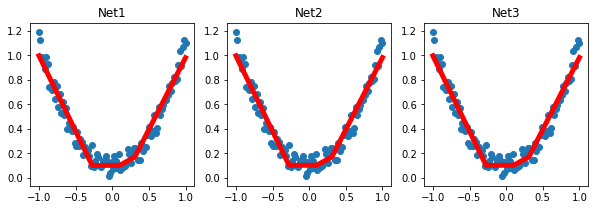

In [5]:
"""
View more, visit my tutorial page: https://morvanzhou.github.io/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou
Dependencies:
torch: 0.4
matplotlib
"""
import torch
import matplotlib.pyplot as plt

# torch.manual_seed(1)    # reproducible

# fake data
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())  # noisy y data (tensor), shape=(100, 1)

# The code below is deprecated in Pytorch 0.4. Now, autograd directly supports tensors
# x, y = Variable(x, requires_grad=False), Variable(y, requires_grad=False)


def save():
    # save net1
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )
    optimizer = torch.optim.SGD(net1.parameters(), lr=0.5)
    loss_func = torch.nn.MSELoss()

    for t in range(100):
        prediction = net1(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # plot result
    plt.figure(1, figsize=(10, 3))
    plt.subplot(131)
    plt.title('Net1')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

    # 2 ways to save the net
    torch.save(net1, 'net.pkl')  # save entire net
    torch.save(net1.state_dict(), 'net_params.pkl')   # save only the parameters


def restore_net():
    # restore entire net1 to net2
    net2 = torch.load('net.pkl')
    prediction = net2(x)

    # plot result
    plt.subplot(132)
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)


def restore_params():
    # restore only the parameters in net1 to net3
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )

    # copy net1's parameters into net3
    net3.load_state_dict(torch.load('net_params.pkl'))
    prediction = net3(x)

    # plot result
    plt.subplot(133)
    plt.title('Net3')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    plt.show()

# save net1
save()

# restore entire net (may slow)
restore_net()

# restore only the net parameters
restore_params()

OrderedDict([('0.weight', tensor([[ 0.5021],
        [ 1.1997],
        [-0.1124],
        [-0.5676],
        [-1.0946],
        [ 0.4477],
        [-0.0375],
        [ 0.2839],
        [ 0.5758],
        [-0.5087]])), ('0.bias', tensor([-0.6037, -0.3134, -0.4003, -0.1928, -0.1552, -0.5382,  0.3999, -0.6772,
        -0.8808,  0.5404])), ('2.weight', tensor([[-0.2202,  0.8876,  0.1100,  0.4952,  0.7991,  0.2937,  0.1707, -0.0027,
          0.2497, -0.2161]])), ('2.bias', tensor([0.1316]))])


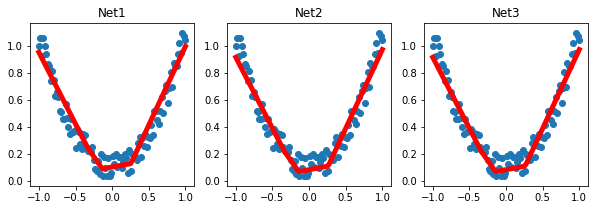

In [10]:
import torch
import matplotlib.pyplot as plt

# torch.manual_seed(1)    # reproducible

# fake data
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())  # noisy y data (tensor), shape=(100, 1)

# The code below is deprecated in Pytorch 0.4. Now, autograd directly supports tensors
# x, y = Variable(x, requires_grad=False), Variable(y, requires_grad=False)


def main():
    # save net1
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )
    optimizer = torch.optim.SGD(net1.parameters(), lr=0.5)
    loss_func = torch.nn.MSELoss()

    for t in range(100):
        prediction = net1(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # plot result
    plt.figure(1, figsize=(10, 3))
    plt.subplot(131)
    plt.title('Net1')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

    # 2 ways to save the net
    torch.save(net1, 'net.pkl')  # save entire net
    torch.save(net1.state_dict(), 'net_params.pkl')   # save only the parameters


    # restore entire net1 to net2
    net2 = torch.load('net.pkl')
    prediction = net2(x)

    # plot result
    plt.subplot(132)
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)


    # restore only the parameters in net1 to net3
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )

    # copy net1's parameters into net3
    parameters = torch.load('net_params.pkl')
    net3.load_state_dict(parameters)
    prediction = net3(x)
    
    print(parameters)

    # plot result
    plt.subplot(133)
    plt.title('Net3')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    plt.show()

    
main()


In [19]:
# Example of using Sequential
from torch import nn
from collections import OrderedDict

model1 = nn.Sequential(
          nn.Conv2d(1,20,5),
          nn.ReLU(),
          nn.Conv2d(20,64,5),
          nn.ReLU()
        )

# Example of using Sequential with OrderedDict
model2 = nn.Sequential(OrderedDict([
          ('conv1', nn.Conv2d(1,20,5)),
          ('relu1', nn.ReLU()),
          ('conv2', nn.Conv2d(20,64,5)),
          ('relu2', nn.ReLU())
        ]))

In [20]:
model1

Sequential(
  (0): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): Conv2d(20, 64, kernel_size=(5, 5), stride=(1, 1))
  (3): ReLU()
)

In [21]:
model2

Sequential(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (conv2): Conv2d(20, 64, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
)

In [22]:
parameters = torch.load('net_params.pkl')

In [27]:
print(parameters)

OrderedDict([('0.weight', tensor([[ 0.5021],
        [ 1.1997],
        [-0.1124],
        [-0.5676],
        [-1.0946],
        [ 0.4477],
        [-0.0375],
        [ 0.2839],
        [ 0.5758],
        [-0.5087]])), ('0.bias', tensor([-0.6037, -0.3134, -0.4003, -0.1928, -0.1552, -0.5382,  0.3999, -0.6772,
        -0.8808,  0.5404])), ('2.weight', tensor([[-0.2202,  0.8876,  0.1100,  0.4952,  0.7991,  0.2937,  0.1707, -0.0027,
          0.2497, -0.2161]])), ('2.bias', tensor([0.1316]))])


In [26]:
parameters['0.weight']

tensor([[ 0.5021],
        [ 1.1997],
        [-0.1124],
        [-0.5676],
        [-1.0946],
        [ 0.4477],
        [-0.0375],
        [ 0.2839],
        [ 0.5758],
        [-0.5087]])

In [74]:
for k,v in parameters.items():
    print(k,':',v)
    print(v.size(), '\n')

0.weight : tensor([[ 0.5021],
        [ 1.1997],
        [-0.1124],
        [-0.5676],
        [-1.0946],
        [ 0.4477],
        [-0.0375],
        [ 0.2839],
        [ 0.5758],
        [-0.5087]])
torch.Size([10, 1]) 

0.bias : tensor([-0.6037, -0.3134, -0.4003, -0.1928, -0.1552, -0.5382,  0.3999, -0.6772,
        -0.8808,  0.5404])
torch.Size([10]) 

2.weight : tensor([[-0.2202,  0.8876,  0.1100,  0.4952,  0.7991,  0.2937,  0.1707, -0.0027,
          0.2497, -0.2161]])
torch.Size([1, 10]) 

2.bias : tensor([0.1316])
torch.Size([1]) 



In [ ]:
parameters.items[]

In [52]:
for i in range(3), k,v in parameters.items():
    print(i,',',k)
    print(i,',',v)
    print(v.size(), '\n')

range(0, 3) , 2.bias
range(0, 3) , tensor([0.1316])
torch.Size([1]) 

2.bias , 2.bias
2.bias , tensor([0.1316])
torch.Size([1]) 

False , 2.bias
False , tensor([0.1316])
torch.Size([1]) 



In [38]:
parameters.items()

odict_items([('0.weight', tensor([[ 0.5021],
        [ 1.1997],
        [-0.1124],
        [-0.5676],
        [-1.0946],
        [ 0.4477],
        [-0.0375],
        [ 0.2839],
        [ 0.5758],
        [-0.5087]])), ('0.bias', tensor([-0.6037, -0.3134, -0.4003, -0.1928, -0.1552, -0.5382,  0.3999, -0.6772,
        -0.8808,  0.5404])), ('2.weight', tensor([[-0.2202,  0.8876,  0.1100,  0.4952,  0.7991,  0.2937,  0.1707, -0.0027,
          0.2497, -0.2161]])), ('2.bias', tensor([0.1316]))])

In [68]:
import collections
 
print ('Regular dictionary:')
d1 = {}
d1['a'] = 'A'
d1['b'] = 'B'
d1['c'] = 'C'
for k,v in d1.items():
    print (k,v)

print ('\nOrderedDict:')
d2 = collections.OrderedDict()
d2['a'] = 'A'
d2['b'] = 'B'
d2['c'] = 'C'
for k,v in d2.items():
    print (k,v)

Regular dictionary:
a A
b B
c C

OrderedDict:
a A
b B
c C


In [69]:
d1

{'a': 'A', 'b': 'B', 'c': 'C'}

In [70]:
d2

OrderedDict([('a', 'A'), ('b', 'B'), ('c', 'C')])

In [61]:

import collections
 
print ('Regular dictionary:')
d1={}
d1['a']='A'
d1['b']='B'
d1['c']='C'
 
d2={}
d2['c']='C'
d2['a']='A'
d2['b']='B'
 
print (d1==d2)
 
print ('\nOrderedDict:')
d1=collections.OrderedDict()
d1['a']='A'
d1['b']='B'
d1['c']='C'
 
d2=collections.OrderedDict()
d2['c']='C'
d2['a']='A'
d2['b']='B'
 
print  (d1==d2)

Regular dictionary:
True

OrderedDict:
False


In [72]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                  ('conv1', nn.Conv2d(1,20,5)),
                  ('relu1', nn.ReLU()),
                  ('conv2', nn.Conv2d(20,64,5)),
                  ('relu2', nn.ReLU())
                ]))
# 打印网络的结构
print(model)

Sequential(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (conv2): Conv2d(20, 64, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
)


In [73]:
params=model.state_dict() 
for k,v in params.items():
    print(k)    #打印网络中的变量名
print(params['conv1.weight'])   #打印conv1的weight
print(params['conv1.bias']) 

conv1.weight
conv1.bias
conv2.weight
conv2.bias
tensor([[[[-0.1988, -0.1182, -0.0970, -0.1641, -0.0194],
          [-0.0662, -0.1737,  0.0831,  0.1162,  0.0937],
          [-0.0140, -0.1867,  0.0931, -0.0848,  0.1355],
          [-0.0227,  0.1303,  0.1630, -0.1846, -0.1161],
          [-0.1443,  0.0606, -0.1594,  0.1125,  0.1013]]],


        [[[ 0.0964,  0.0597, -0.0649, -0.0723,  0.0316],
          [-0.1264, -0.1133, -0.1999, -0.0652,  0.1812],
          [-0.0602, -0.1688,  0.0286,  0.0872, -0.1426],
          [-0.1832, -0.1351, -0.1574, -0.1655,  0.0465],
          [-0.0979, -0.0988,  0.0717,  0.0441,  0.0733]]],


        [[[-0.0714,  0.1263, -0.0695, -0.1842,  0.1250],
          [-0.1687,  0.1115, -0.0721, -0.0947,  0.1202],
          [ 0.0315,  0.0252,  0.1657,  0.0673, -0.1542],
          [ 0.0509, -0.0429,  0.0180,  0.1880, -0.0621],
          [ 0.0985,  0.1093, -0.0577,  0.0194, -0.0002]]],


        [[[ 0.0107,  0.0220, -0.0208,  0.1232, -0.0982],
          [-0.0108, -0.1394,

In [77]:
d['a']

'A'

In [79]:
d.items()

odict_items([('a', 'A'), ('b', 'B'), ('c', 'C')])

In [81]:
d

OrderedDict([('a', 'A'), ('b', 'B'), ('c', 'C')])

In [ ]:
pretrained_dict =  {k: v for k, v in pretrained_dict.items() if k in model_dict} 

In [80]:
d1 

{'a': 'A', 'b': 'B', 'c': 'C'}

In [ ]:
{k: v for k, v in pretrained_dict.items() if k in model_dict} 

In [88]:
d1 = collections.OrderedDict()
d1['a'] = 'A'
d1['b'] = 'B'
d1['c'] = 'C'
d1['d'] = 'D'
for k,v in d1.items():
    print (k,v)

d2 = collections.OrderedDict()
d2['a'] = 'A'
d2['b'] = 'B'
d2['e'] = 'E'
for k,v in d2.items():
    print (k,v)

a A
b B
c C
d D
a A
b B
e E


In [105]:
d3 = {k:v for k, v in d1.items() if k in d2} 

In [106]:
d3

{'a': 'A', 'b': 'B'}

In [108]:
d3

OrderedDict([('a', 'A'), ('b', 'B')])

In [93]:
d1

OrderedDict([('a', 'A'), ('b', 'B'), ('c', 'C'), ('d', 'D')])

In [99]:
d4 = collections.OrderedDict([('a','A'),('b', 'B')])

In [100]:
d4

OrderedDict([('a', 'A'), ('b', 'B')])

In [102]:
d5 = {'a':'A','b': 'B'}

In [104]:
d5

{'a': 'A', 'b': 'B'}

In [110]:
d1

OrderedDict([('a', 'A'), ('b', 'B'), ('c', 'C'), ('d', 'D')])

In [111]:
d2

OrderedDict([('a', 'A'), ('b', 'B'), ('e', 'E')])

In [115]:
d1['a'] = ''

In [117]:
d1

OrderedDict([('a', '132'), ('b', 'B'), ('c', 'C'), ('d', 'D')])

In [121]:
k for k, v in d1.items() if (k == 'a')

SyntaxError: invalid syntax (<ipython-input-121-92229a4c3709>, line 1)

OrderedDict([('a', '132')])

In [131]:
print(k) for k, v in d1.items() if k == 'a'

SyntaxError: invalid syntax (<ipython-input-131-37b410cc074c>, line 1)

In [135]:
for i in range(5) :
    if i%2==0:
        print(i)

0
2
4


In [140]:
for i in range(5):
    i

In [228]:
d1 = collections.OrderedDict()
d1['a'] = 'A'
d1['b'] = 'B'
d1['c'] = 'C'
d1['d'] = 'D'
for k,v in d1.items():
    print (k,v)

d2 = collections.OrderedDict()
d2['a'] = '100'
d2['b'] = 'B'
d2['e'] = 'E'
for k,v in d2.items():
    print (k,v)

a A
b B
c C
d D
a 100
b B
e E


In [229]:
print(d1)
print(d2)

OrderedDict([('a', 'A'), ('b', 'B'), ('c', 'C'), ('d', 'D')])
OrderedDict([('a', '100'), ('b', 'B'), ('e', 'E')])


In [237]:
a = d1.copy()
a.update(d2)
a

OrderedDict([('a', '100'), ('b', 'B'), ('c', 'C'), ('d', 'D'), ('e', 'E')])

In [238]:
b = dict(d1, **d2)
b

{'a': '100', 'b': 'B', 'c': 'C', 'd': 'D', 'e': 'E'}

In [239]:
b = collections.OrderedDict(a)
b

OrderedDict([('a', '100'), ('b', 'B'), ('c', 'C'), ('d', 'D'), ('e', 'E')])

In [241]:
b = collections.OrderedDict(d1, **d2)
b

OrderedDict([('a', '100'), ('b', 'B'), ('c', 'C'), ('d', 'D'), ('e', 'E')])

In [233]:
d3 = collections.OrderedDict( [ (k,v) for k, v in d1.items() if k in d2 ] )
d3

OrderedDict([('a', 'A'), ('b', 'B')])

In [173]:
collections.OrderedDict( [ (k,v) for k, v in d1.items() if k == 'a' ] )

OrderedDict([('a', '132')])

In [174]:
for k, v in d1.items(): 
    if k == 'a':
        print(v)

132


In [245]:
d2

OrderedDict([('a', '100'), ('b', 'B'), ('e', 'E')])

In [246]:
# 把d2的key a,b,e 改成 1,2,3, 在把 d1 d2合并. 关键是, d1 d2不能损失任何一个信息
d3  = d2.copy()

d3.update(x = d3.pop('a'))
d3.update(y = d3.pop('b'))
d3.update(z = d3.pop('e'))

In [247]:
d3

OrderedDict([('x', '100'), ('y', 'B'), ('z', 'E')])

In [196]:
d = {'a':1, 'b':2}
d.update(y=d.pop('a'))
d

{'b': 2, 'y': 1}

In [181]:
'a'

'a'

TypeError: int() argument must be a string, a bytes-like object or a number, not 'collections.OrderedDict'